# EDA

## Loading the Dataset

In [1]:
import pandas as pd

# Load the dataset from your local path
df = pd.read_csv('./AI_Human.csv')  

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [2]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

## Check Null Values & Noise

In [3]:
# Check for missing values in the dataset
df.isnull().sum()


text         0
generated    0
dtype: int64

## Data Cleaning and Processing

In [4]:
duplicate_mask = df.duplicated(subset='text', keep=False)
df[duplicate_mask]

,text,generated


In [5]:
def remove_tags(text):
    tags = ['\n', '\'']
    for tag in tags:
        text = text.replace(tag, ' ' if tag == '\n' else '')
    
    return text


df['text'] = df['text'].apply(remove_tags)

# https://www.kaggle.com/code/saurabhkailaskuche/ai-generated-vs-human

In [6]:
# Ensure text_length is calculated
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Find rows with text length 0
empty_rows = df[df['text_length'] <= 15]

# Display the number of such rows and optionally print them
print(f"Number of rows with text length 0: {len(empty_rows)}")
empty_rows

Number of rows with text length 0: 32


,text,generated,text_length
2380,Code] [Email Address] [Phone Number],1.0,5
2381,] [Email] [Phone Number],1.0,4
2384,],1.0,1
2385,] [Email] [Phone Number],1.0,4
2388,] [Email Address] [Phone Number],1.0,5
28737,Facial action coding,1.0,3
29318,Community service is an integral part of ever...,1.0,14
29331,Community service.,1.0,2
29337,Community service refers to the activities an...,1.0,11
29374,"Write an essay on the topic ""A Cowboy Who Rod...",1.0,12


In [7]:
df = df[df['text_length'] >= 15]

In [8]:
from utils import preprocess_text

## Process the Data in Parallel using Joblib

In [9]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
num_cores

32

In [10]:
df['tokens'] = Parallel(n_jobs=num_cores)(
    delayed(preprocess_text)(text) for text in df['text']
)

In [11]:
df.head()

,text,generated,text_length,tokens
0,Cars. Cars have been around since they became ...,0.0,584,car car around since became famous 1900s henry...
1,Transportation is a large necessity in most co...,0.0,462,transportation large necessity country worldwi...
2,"""Americas love affair with its vehicles seems ...",0.0,744,america love affair vehicle seems cooling say ...
3,How often do you ride in a car? Do you drive a...,0.0,686,often ride car drive one motor vehicle work st...
4,Cars are a wonderful thing. They are perhaps o...,0.0,871,car wonderful thing perhaps one world greatest...


In [12]:
# Split all tokens and flatten them into a single list
all_tokens = df['tokens'].str.split().explode()

# Get number of unique tokens
unique_token_count = all_tokens.nunique()
print("Number of unique tokens:", unique_token_count)



Number of unique tokens: 250972


In [76]:
df.shape

(487203, 4)

In [78]:
!pip install datasketch

In [79]:
# ---------- Config ----------
THRESH_OVERLAP = 0.90        # your “90% overlapping tokens” requirement
NUM_PERM = 64                # MinHash permutations (64 is a good accuracy/memory tradeoff)
LSH_JACCARD_THRESHOLD = 0.85 # LSH threshold (slightly lower to avoid missing borderline pairs)

# ---------- Imports ----------
from datasketch import MinHash, MinHashLSH
from joblib import Parallel, delayed
import math

# ---------- Helpers ----------
def tokens_to_set(tokens_str: str):
    # tokens column is space-separated; convert to a set of unique tokens
    # (if your 'tokens' already has unique words, this is cheap)
    return set(tokens_str.split())

def minhash_from_set(s: set, num_perm=NUM_PERM) -> MinHash:
    m = MinHash(num_perm=num_perm)
    for w in s:
        m.update(w.encode('utf-8'))
    return m

def overlap_coeff(a: set, b: set) -> float:
    # |A ∩ B| / min(|A|, |B|)
    if not a or not b:
        return 0.0
    return len(a & b) / float(min(len(a), len(b)))

# ---------- Main (Incremental LSH to limit memory) ----------
# We iterate rows once; for each row:
# 1) build its MinHash
# 2) query LSH for candidates among prior rows
# 3) verify with exact overlap
# 4) insert into LSH
# This avoids querying every pair twice and keeps RAM in check.

tokens_series = df['tokens']      # <- your DataFrame column
lsh = MinHashLSH(threshold=LSH_JACCARD_THRESHOLD, num_perm=NUM_PERM)

similar_pairs = []  # will store tuples: (i, j, overlap)
# If you expect many matches, consider writing to disk in chunks instead of keeping all in RAM.

for i, tok_str in enumerate(tokens_series):
    A = tokens_to_set(tok_str)

    # Build MinHash for this row
    mh = minhash_from_set(A)

    # Get candidates among previously inserted rows
    candidates = lsh.query(mh)

    # Verify with exact overlap, report each pair once (j < i because only previous inserted)
    for j in candidates:
        B = tokens_to_set(tokens_series.iloc[j])
        oc = overlap_coeff(A, B)
        if oc >= THRESH_OVERLAP:
            similar_pairs.append((j, i, oc))  # store (older_index, current_index, score)

    # Insert current row into index *after* querying to avoid self/duplicate matches
    lsh.insert(i, mh)

# Convert to a DataFrame if you want
import pandas as pd
pairs_df = pd.DataFrame(similar_pairs, columns=['idx_a', 'idx_b', 'overlap_coeff'])
print("Found candidate near-duplicates:", len(pairs_df))
pairs_df.head()


Found candidate near-duplicates: 1169225


,idx_a,idx_b,overlap_coeff
0,1395,1397,0.930693
1,1395,1398,0.955224
2,1397,1398,0.925373
3,1400,1401,0.961111
4,1398,1401,0.916667


In [81]:
import numpy as np
import pandas as pd

# --- Inputs assumed ---
# df: your original DataFrame with column 'generated' (0/1)
# pairs_df: DataFrame with columns ['idx_a','idx_b','overlap_coeff'] from your near-duplicate finder

# Safety checks
assert 'generated' in df.columns
assert {'idx_a','idx_b'}.issubset(pairs_df.columns)

# Use positional labels array to avoid index/key issues
labels_arr = df['generated'].astype(int).to_numpy()
N = len(df)

# Edges as numpy arrays (ints)
a = pairs_df['idx_a'].to_numpy(dtype=np.int64)
b = pairs_df['idx_b'].to_numpy(dtype=np.int64)

# --- Union-Find (Disjoint Set) over N rows (fast & memory-light) ---
class DSU:
    def __init__(self, n):
        self.parent = np.arange(n, dtype=np.int64)
        self.size = np.ones(n, dtype=np.int64)
    def find(self, x):
        # path compression
        while self.parent[x] != x:
            self.parent[x] = self.parent[self.parent[x]]
            x = self.parent[x]
        return x
    def union(self, x, y):
        rx, ry = self.find(x), self.find(y)
        if rx == ry: 
            return
        # union by size
        if self.size[rx] < self.size[ry]:
            rx, ry = ry, rx
        self.parent[ry] = rx
        self.size[rx] += self.size[ry]

dsu = DSU(N)
for i, j in zip(a, b):
    dsu.union(i, j)

# Only nodes that appear in at least one pair
involved = np.unique(np.concatenate([a, b]))

# Root for each involved node -> group id 0..G-1
roots = np.array([dsu.find(i) for i in involved], dtype=np.int64)
uniq_roots, group_ids = np.unique(roots, return_inverse=True)

# Build nodes_df: each member with its group and label
nodes_df = pd.DataFrame({
    'row_idx': involved,           # positional row index in df
    'group_id': group_ids,         # 0..num_groups-1
    'label':   labels_arr[involved]
})

# Per-group label composition
label_counts = (nodes_df
                .groupby(['group_id','label'])
                .size()
                .unstack(fill_value=0)
                .rename(columns={0:'n_human', 1:'n_ai'}))

label_counts['size'] = label_counts['n_human'] + label_counts['n_ai']
label_counts = label_counts.sort_values('size', ascending=False)

# Keep only true "similarity groups" (size >= 2)
label_counts = label_counts[label_counts['size'] >= 2]
num_groups = label_counts.shape[0]

print(f"Total similar groups (connected components, size ≥ 2): {num_groups}")

# Pure vs mixed groups
pure_groups = (label_counts[['n_human','n_ai']].min(axis=1) == 0).sum()
mixed_groups = num_groups - pure_groups
print(f"Pure groups: {pure_groups}   Mixed groups: {mixed_groups}")

# Size distribution (first few sizes)
print("\nGroup size distribution (size -> #groups):")
print(label_counts['size'].value_counts().sort_index().head(20))

# Top 10 largest groups with composition
summary = label_counts.reset_index()
print("\nTop 10 largest groups with label composition:")
print(summary.head(10))

# Members of the largest group (positional row indices in df)
largest_gid = summary.iloc[0]['group_id'] if len(summary) else None
if largest_gid is not None:
    members_largest = nodes_df.loc[nodes_df['group_id'] == largest_gid, 'row_idx'].tolist()
    print(f"\nLargest group id: {largest_gid}  size: {len(members_largest)}")
    # Example: inspect their labels quickly
    print(pd.Series(labels_arr[members_largest]).value_counts().rename(index={0:'human',1:'ai'}))
    # You can also peek at the texts:
    # df.iloc[members_largest][['generated','text']].head()


Total similar groups (connected components, size ≥ 2): 54422
Pure groups: 54389   Mixed groups: 33

Group size distribution (size -> #groups):
size
2     5685
3     3579
4     5968
5     8169
6     8674
7     7098
8     4637
9     2680
10    1577
11    1141
12    1003
13     878
14     739
15     594
16     478
17     331
18     233
19     166
20     167
21     146
Name: count, dtype: int64

Top 10 largest groups with label composition:
label  group_id  n_human  n_ai  size
0          2242       35     0    35
1           183       30     0    30
2           127       30     0    30
3           431       29     0    29
4           214       29     0    29
5          4295       29     0    29
6           543       29     0    29
7          1051       29     0    29
8           884       29     0    29
9           470       29     0    29

Largest group id: 2242  size: 35
human    35
Name: count, dtype: int64


In [82]:
import numpy as np

# safety checks
assert {'idx_a','idx_b'}.issubset(pairs_df.columns)
assert 'generated' in df.columns

# labels as a positional array
labels_arr = df['generated'].astype(int).to_numpy()

# all unique rows that appear in at least one similar-pair edge
involved = np.unique(pairs_df[['idx_a','idx_b']].to_numpy().ravel())

# counts by label among similar rows
n_label0 = (labels_arr[involved] == 0).sum()
n_label1 = (labels_arr[involved] == 1).sum()

print(f"Similar rows total: {involved.size}")
print(f"Label 0 (human)   : {n_label0}")
print(f"Label 1 (AI)      : {n_label1}")
print(f"Label 0 %         : {n_label0 / involved.size:.3%}")
print(f"Label 1 %         : {n_label1 / involved.size:.3%}")


Similar rows total: 359337
Label 0 (human)   : 231932
Label 1 (AI)      : 127405
Label 0 %         : 64.544%
Label 1 %         : 35.456%


In [ ]:
import numpy as np

# safety checks
assert {'idx_a','idx_b'}.issubset(pairs_df.columns)
assert 'generated' in df.columns

# labels as a positional array
labels_arr = df['generated'].astype(int).to_numpy()

# all unique rows that appear in at least one similar-pair edge
involved = np.unique(pairs_df[['idx_a','idx_b']].to_numpy().ravel())

# counts by label among similar rows
n_label0 = (labels_arr[involved] == 0).sum()
n_label1 = (labels_arr[involved] == 1).sum()

print(f"Similar rows total: {involved.size}")
print(f"Label 0 (human)   : {n_label0}")
print(f"Label 1 (AI)      : {n_label1}")
print(f"Label 0 %         : {n_label0 / involved.size:.3%}")
print(f"Label 1 %         : {n_label1 / involved.size:.3%}")


Similar rows total: 359337
Label 0 (human)   : 231932
Label 1 (AI)      : 127405
Label 0 %         : 64.544%
Label 1 %         : 35.456%


## Class Distribution

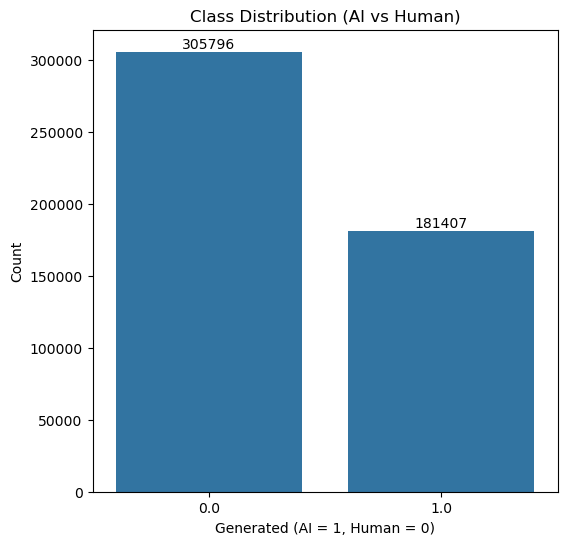

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution with count labels
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='generated', data=df)
plt.title('Class Distribution (AI vs Human)')
plt.xlabel('Generated (AI = 1, Human = 0)')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}', (x, y), ha='center', va='bottom')

plt.show()


## Text Length Analysis (Tokens)

In [66]:
df['token_length'] = df['tokens'].apply(lambda x: len(x.split()))

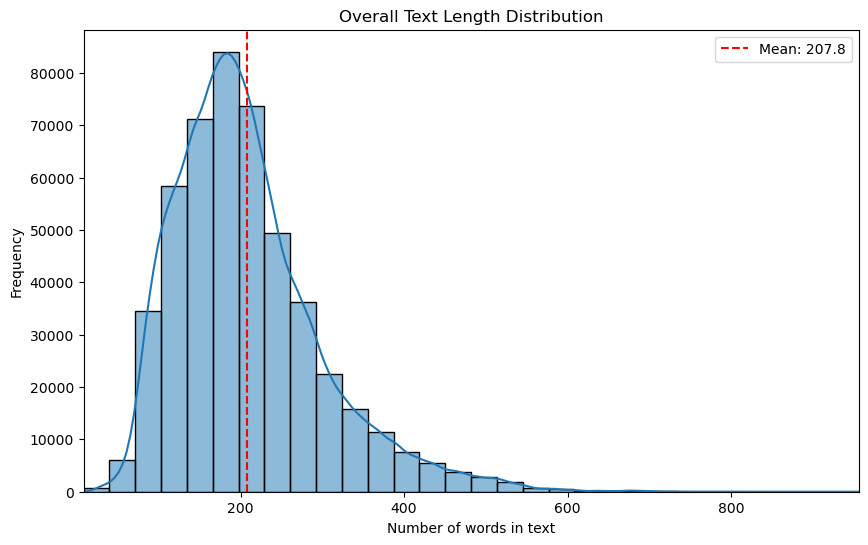

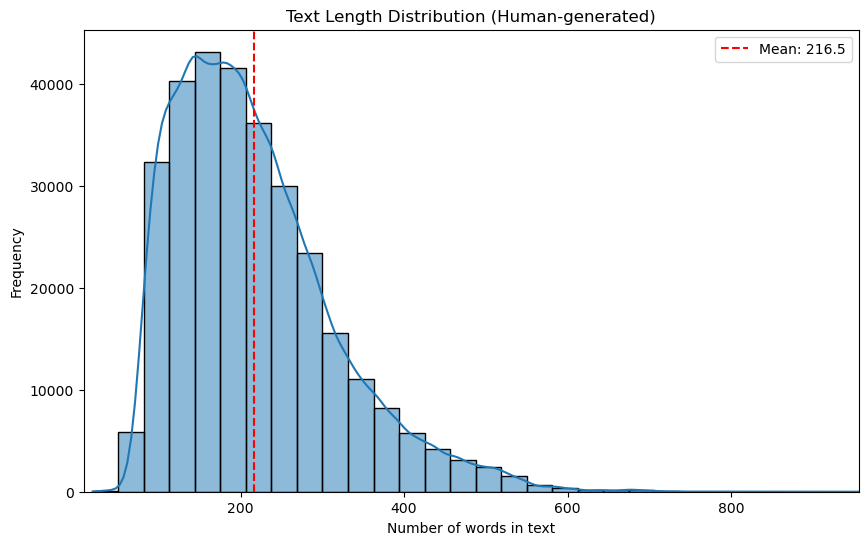

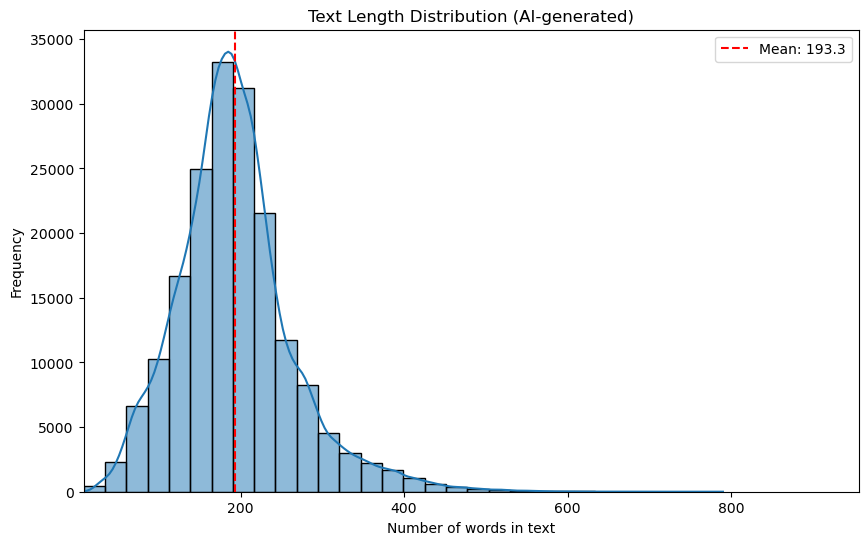

In [67]:
# Shared x-axis range
x_min = df['token_length'].min()
x_max = df['token_length'].max()

# 2) Overall text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['token_length'], kde=True, bins=30)
plt.axvline(df['token_length'].mean(), color='red', linestyle='--', label=f"Mean: {df['token_length'].mean():.1f}")
plt.title('Overall Text Length Distribution')
plt.xlabel('Number of words in text')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.legend()
plt.show()

# 3) Human-generated text length distribution
human_texts = df[df['generated'] == 0]['token_length']
plt.figure(figsize=(10, 6))
sns.histplot(human_texts, kde=True, bins=30)
plt.axvline(human_texts.mean(), color='red', linestyle='--', label=f"Mean: {human_texts.mean():.1f}")
plt.title('Text Length Distribution (Human-generated)')
plt.xlabel('Number of words in text')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.legend()
plt.show()

# 4) AI-generated text length distribution
ai_texts = df[df['generated'] == 1]['token_length']
plt.figure(figsize=(10, 6))
sns.histplot(ai_texts, kde=True, bins=30)
plt.axvline(ai_texts.mean(), color='red', linestyle='--', label=f"Mean: {ai_texts.mean():.1f}")
plt.title('Text Length Distribution (AI-generated)')
plt.xlabel('Number of words in text')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.legend()
plt.show()

C:\Users\Dayso\AppData\Local\Temp\ipykernel_4448\1845824503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='generated', y='token_length', data=df, inner='box', palette='Set2')


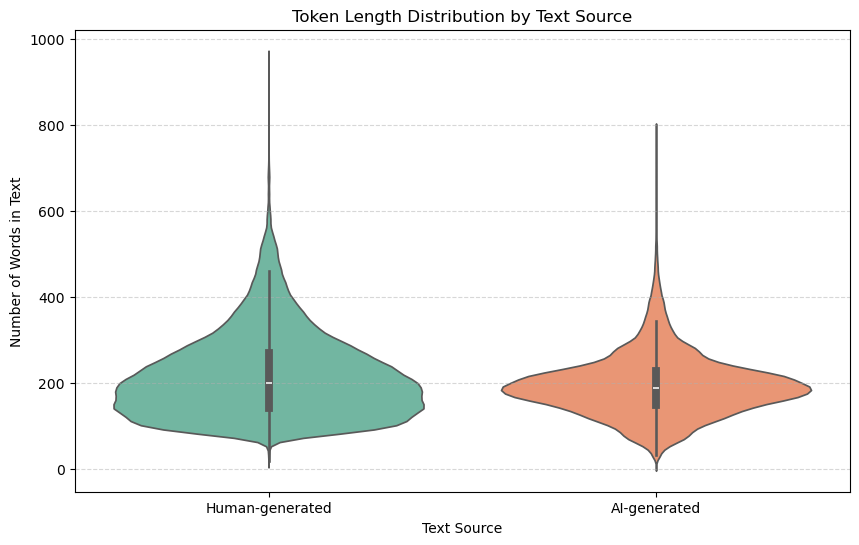

In [116]:
# Violin plot for token length distributions by source
plt.figure(figsize=(10, 6))
sns.violinplot(x='generated', y='token_length', data=df, inner='box', palette='Set2')

# Customize x-axis labels: 0 → Human, 1 → AI
plt.xticks([0, 1], ['Human-generated', 'AI-generated'])

plt.title('Token Length Distribution by Text Source')
plt.xlabel('Text Source')
plt.ylabel('Number of Words in Text')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

##  Vocabulary Richness

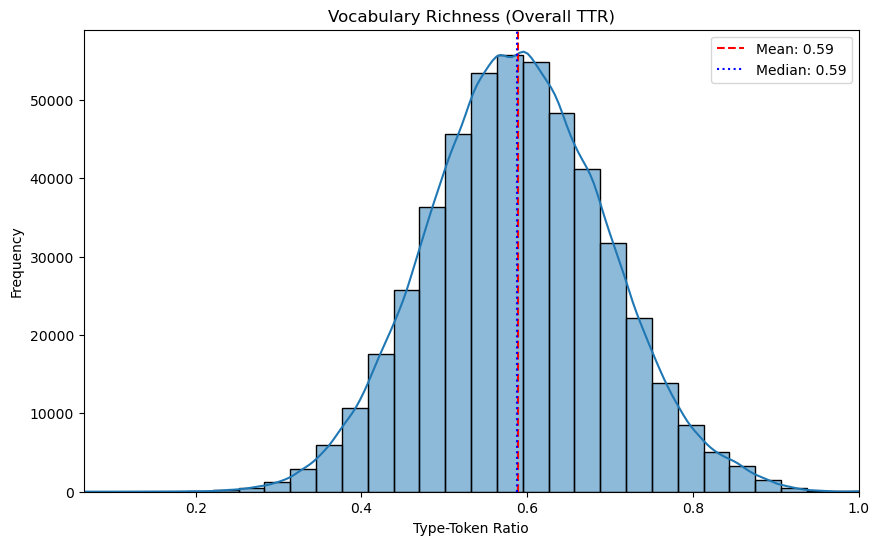

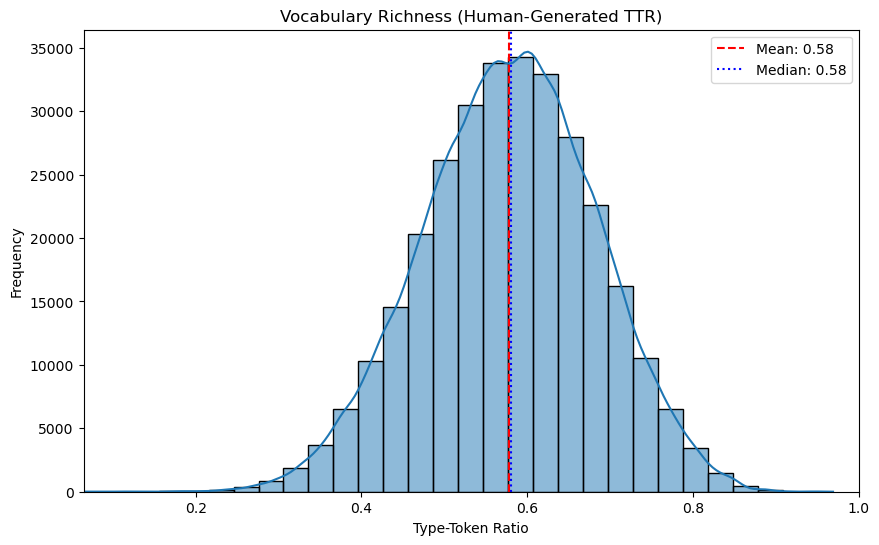

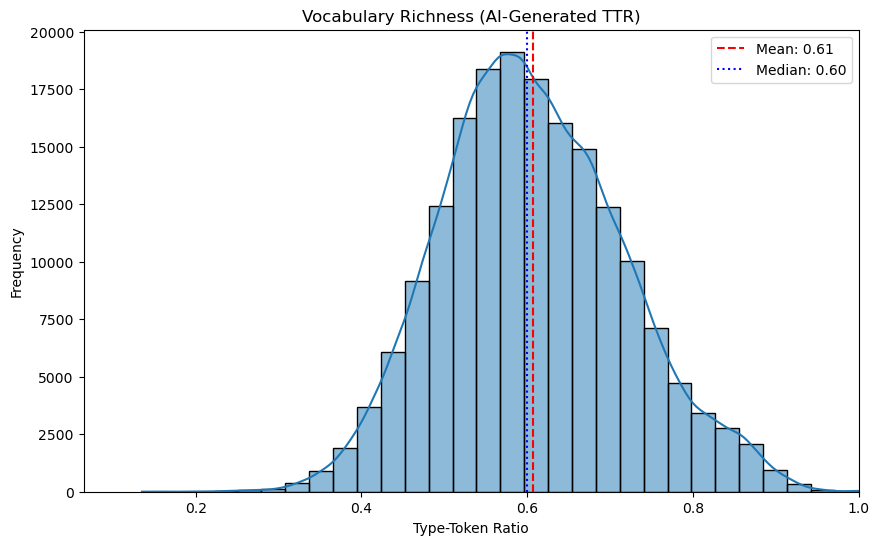

In [68]:
# Ensure TTR is calculated
df['ttr'] = df['tokens'].apply(
    lambda x: len(set(str(x).split())) / len(str(x).split()) if len(str(x).split()) > 0 else 0
)

# Determine common x-axis limits
x_min = df['ttr'].min()
x_max = df['ttr'].max()

# 1. Overall TTR Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ttr'], kde=True, bins=30)
plt.title('Vocabulary Richness (Overall TTR)')
plt.xlabel('Type-Token Ratio')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.axvline(df['ttr'].mean(), color='red', linestyle='--', label=f"Mean: {df['ttr'].mean():.2f}")
plt.axvline(df['ttr'].median(), color='blue', linestyle=':', label=f"Median: {df['ttr'].median():.2f}")
plt.legend()
plt.show()

# 2. Human-generated TTR Distribution
human_ttr = df[df['generated'] == 0]['ttr']
plt.figure(figsize=(10, 6))
sns.histplot(human_ttr, kde=True, bins=30)
plt.title('Vocabulary Richness (Human-Generated TTR)')
plt.xlabel('Type-Token Ratio')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.axvline(human_ttr.mean(), color='red', linestyle='--', label=f"Mean: {human_ttr.mean():.2f}")
plt.axvline(human_ttr.median(), color='blue', linestyle=':', label=f"Median: {human_ttr.median():.2f}")
plt.legend()
plt.show()

# 3. AI-generated TTR Distribution
ai_ttr = df[df['generated'] == 1]['ttr']
plt.figure(figsize=(10, 6))
sns.histplot(ai_ttr, kde=True, bins=30)
plt.title('Vocabulary Richness (AI-Generated TTR)')
plt.xlabel('Type-Token Ratio')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.axvline(ai_ttr.mean(), color='red', linestyle='--', label=f"Mean: {ai_ttr.mean():.2f}")
plt.axvline(ai_ttr.median(), color='blue', linestyle=':', label=f"Median: {ai_ttr.median():.2f}")
plt.legend()
plt.show()


## Feature Engineering

In [72]:
import textstat, re, numpy as np
import nltk
from collections import Counter

# Average sentence length
def avg_sent_len(text):
    sents = nltk.sent_tokenize(text)
    return np.mean([len(nltk.word_tokenize(s)) for s in sents]) if sents else 0

# Hapax ratio
def hapax_ratio(tokens):
    counts = Counter(tokens.split())
    hapax = sum(1 for c in counts.values() if c == 1)
    return hapax / len(tokens.split()) if tokens else 0

# Flesch-Kincaid
def flesch_grade(text):
    try:
        return textstat.flesch_kincaid_grade(text)
    except:   # short texts may error
        return 0


In [73]:
# Parallel for avg_sent_len
df['avg_sent_len'] = Parallel(n_jobs=num_cores)(
    delayed(avg_sent_len)(text) for text in df['text']
)

# Parallel for hapax_ratio
df['hapax_ratio'] = Parallel(n_jobs=num_cores)(
    delayed(hapax_ratio)(tokens) for tokens in df['tokens']
)

# Parallel for flesch_grade
df['flesch_grade'] = Parallel(n_jobs=num_cores)(
    delayed(flesch_grade)(text) for text in df['text']
)

In [74]:
df.head()

,text,generated,text_length,tokens,token_length,ttr,avg_sent_len,hapax_ratio,flesch_grade
0,Cars. Cars have been around since they became ...,0.0,584,car car around since became famous 1900s henry...,323,0.613003,28.478261,0.442724,11.345828
1,Transportation is a large necessity in most co...,0.0,462,transportation large necessity country worldwi...,265,0.660377,19.296296,0.483019,9.243074
2,"""Americas love affair with its vehicles seems ...",0.0,744,america love affair vehicle seems cooling say ...,411,0.608273,17.395833,0.433090,9.713144
3,How often do you ride in a car? Do you drive a...,0.0,686,often ride car drive one motor vehicle work st...,374,0.687166,16.872340,0.518717,8.120437
4,Cars are a wonderful thing. They are perhaps o...,0.0,871,car wonderful thing perhaps one world greatest...,470,0.497872,19.300000,0.317021,7.904784


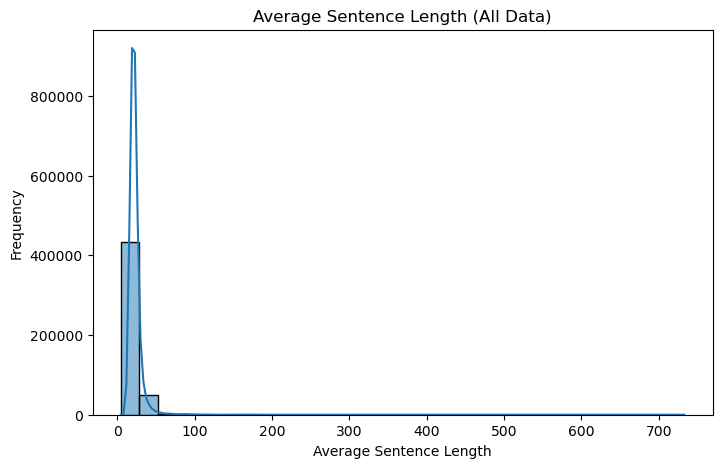

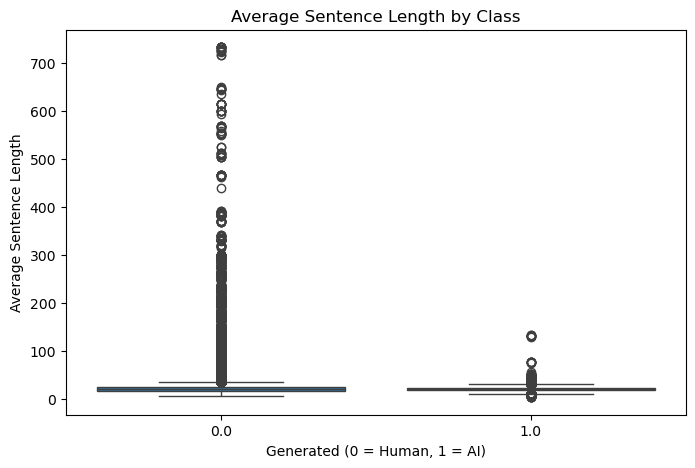

In [77]:
plt.figure(figsize=(8, 5))
sns.histplot(df['avg_sent_len'], kde=True, bins=30)
plt.title("Average Sentence Length (All Data)")
plt.xlabel("Average Sentence Length")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='generated', y='avg_sent_len')
plt.title("Average Sentence Length by Class")
plt.xlabel("Generated (0 = Human, 1 = AI)")
plt.ylabel("Average Sentence Length")
plt.show()


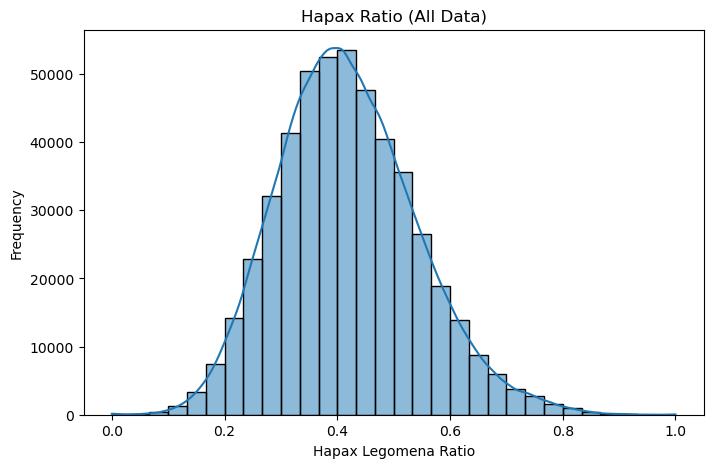

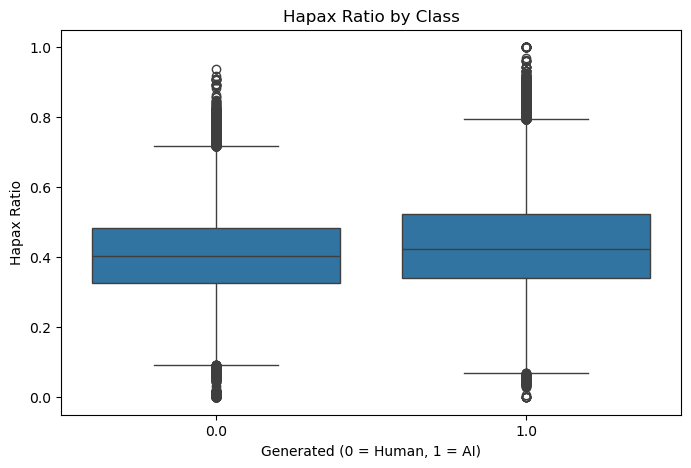

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(df['hapax_ratio'], kde=True, bins=30)
plt.title("Hapax Ratio (All Data)")
plt.xlabel("Hapax Legomena Ratio")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='generated', y='hapax_ratio')
plt.title("Hapax Ratio by Class")
plt.xlabel("Generated (0 = Human, 1 = AI)")
plt.ylabel("Hapax Ratio")
plt.show()


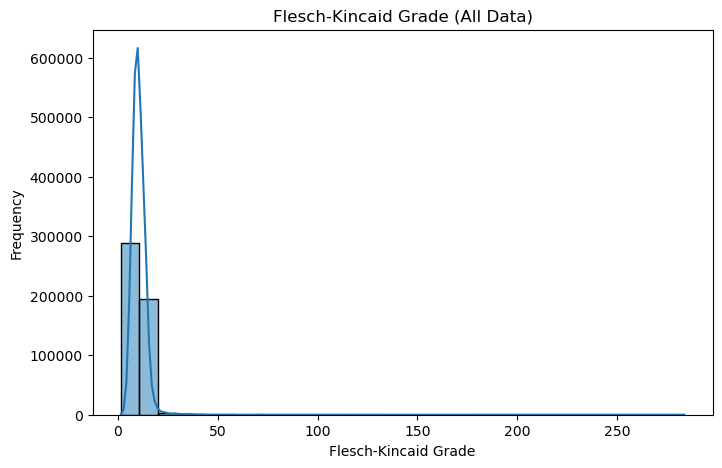

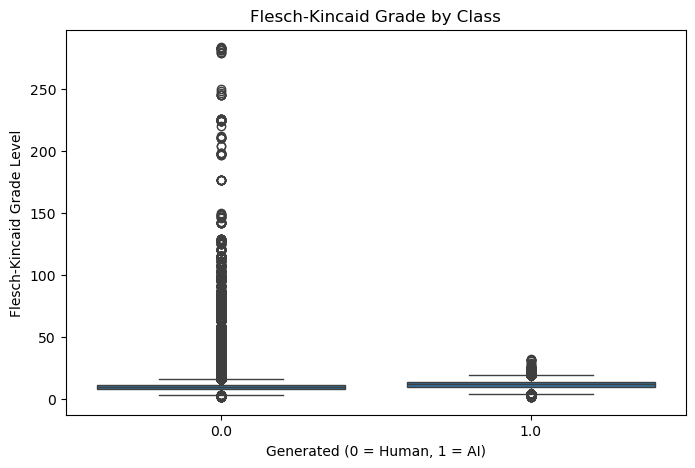

In [79]:
plt.figure(figsize=(8, 5))
sns.histplot(df['flesch_grade'], kde=True, bins=30)
plt.title("Flesch-Kincaid Grade (All Data)")
plt.xlabel("Flesch-Kincaid Grade")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='generated', y='flesch_grade')
plt.title("Flesch-Kincaid Grade by Class")
plt.xlabel("Generated (0 = Human, 1 = AI)")
plt.ylabel("Flesch-Kincaid Grade Level")
plt.show()


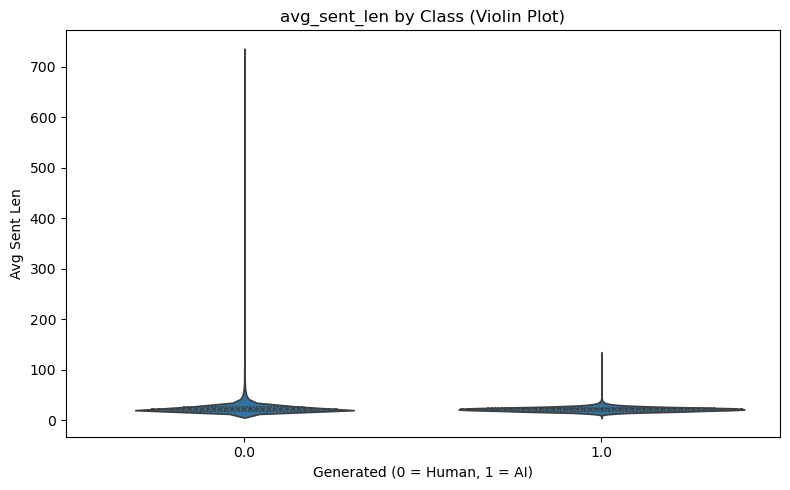

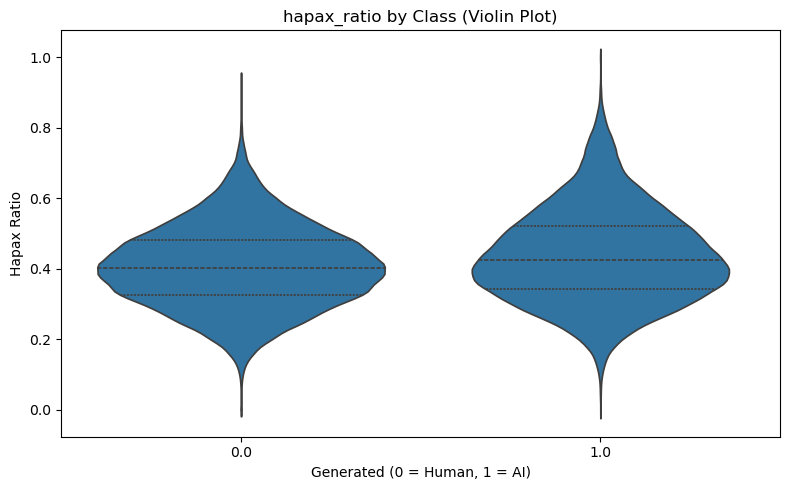

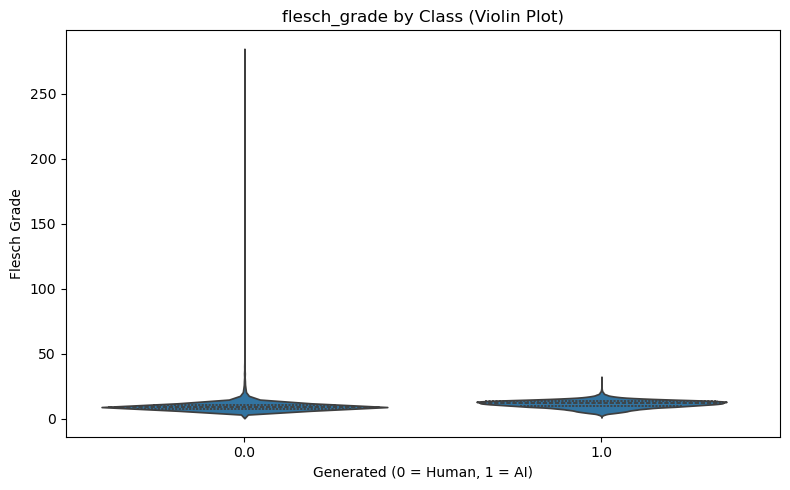

In [82]:
features = ['avg_sent_len', 'hapax_ratio', 'flesch_grade']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df, x='generated', y=feature, inner='quartile')
    plt.title(f"{feature} by Class (Violin Plot)")
    plt.xlabel("Generated (0 = Human, 1 = AI)")
    plt.ylabel(feature.replace('_', ' ').title())
    plt.tight_layout()
    plt.show()


## Correlation

In [83]:
features = ['text_length', 'token_length', 'ttr', 'avg_sent_len', 'hapax_ratio', 'flesch_grade']
from scipy.stats import pointbiserialr
import pandas as pd

correlations = {}

for feature in features:
    corr, p = pointbiserialr(df['generated'], df[feature])
    correlations[feature] = {'correlation': corr, 'p_value': p}

# Convert to DataFrame for easy viewing
corr_df = pd.DataFrame.from_dict(correlations, orient='index')
corr_df = corr_df.sort_values('correlation', ascending=False)
print(corr_df)


              correlation  p_value
flesch_grade     0.157386      0.0
ttr              0.127516      0.0
hapax_ratio      0.120096      0.0
avg_sent_len    -0.088142      0.0
token_length    -0.123881      0.0
text_length     -0.222297      0.0


# TF-IDF - Logistic Regression

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [15]:
tfidf = TfidfVectorizer(
    tokenizer=str.split,       # pre-tokenized text
    ngram_range=(1, 2),        # unigrams + bigrams
    min_df=2,                  # ignore words in fewer than 2 docs
    max_df=0.95,               # ignore very frequent words
    max_features=40000,        # limit feature space
    sublinear_tf=True          # dampen high term frequencies
)


In [16]:
# If you're splitting the data:
from sklearn.model_selection import train_test_split

X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['tokens'], df['generated'], test_size=0.2, stratify=df['generated'], random_state=42
)

X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)


c:\Users\Dayso\anaconda3\envs\pytorch_CV\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [18]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     61159
         1.0       1.00      0.99      1.00     36282

    accuracy                           1.00     97441
   macro avg       1.00      1.00      1.00     97441
weighted avg       1.00      1.00      1.00     97441



In [19]:
feature_names = tfidf.get_feature_names_out()
coefs = clf.coef_[0]
top_pos = sorted(zip(coefs, feature_names), reverse=True)[:20]
top_neg = sorted(zip(coefs, feature_names))[:20]

print("Top AI-indicative terms:")
for coef, word in top_pos:
    print(f"{word}: {coef:.3f}")

print("\nTop Human-indicative terms:")
for coef, word in top_neg:
    print(f"{word}: {coef:.3f}")


Top AI-indicative terms:
additionally: 10.393
important: 9.334
essay: 9.103
super: 8.660
potential: 8.368
conclusion: 8.294
hey: 7.693
firstly: 6.638
essential: 6.631
however: 6.549
significant: 6.352
provide: 6.349
sincerely name: 5.848
know people: 5.554
u learn: 5.322
often: 5.299
privacy: 5.281
consider: 5.257
totally: 5.211
cool: 5.042

Top Human-indicative terms:
would: -10.748
going: -9.209
although: -8.786
go: -8.285
people: -7.389
human: -7.346
paragraph: -7.299
kid: -7.013
car: -6.938
student: -6.818
venus: -6.644
school: -6.642
get: -6.544
percent: -6.520
many: -6.461
driving: -6.212
probably: -5.675
said: -5.618
almost: -5.607
reason: -5.588


## Evaluation with Another Dataset

### Dataset 1

In [28]:
# Load the dataset from your local path
df2 = pd.read_csv('./AI_Generated_Essays.csv')  

# Display basic information about the dataset
df2.info()

# Display the first few rows of the dataset
df2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1460 non-null   object
 1   generated  1460 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB


,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


In [29]:
df2['tokens'] = Parallel(n_jobs=num_cores)(
    delayed(preprocess_text)(text) for text in df2['text']
)

In [30]:
overlap = set(df['tokens']) & set(df2['tokens'])
print(f" Number of overlapping rows: {len(overlap)}")

 Number of overlapping rows: 291


In [31]:
df2 = df2[~df2['tokens'].isin(df['tokens'])].copy()


In [32]:
overlap = set(df['tokens']) & set(df2['tokens'])
print(f" Number of overlapping rows: {len(overlap)}")

 Number of overlapping rows: 0


In [33]:
df2.head()

,text,generated,tokens
0,"Machine learning, a subset of artificial intel...",1,machine learning subset artificial intelligenc...
1,"A decision tree, a prominent machine learning ...",1,decision tree prominent machine learning algor...
2,"Education, a cornerstone of societal progress,...",1,education cornerstone societal progress extend...
3,"Computers, the backbone of modern technology, ...",1,computer backbone modern technology revolution...
4,"Chess, a timeless game of strategy and intelle...",1,chess timeless game strategy intellect transce...


In [34]:
X_df2 = tfidf.transform(df2['tokens'])
y_df2_true = df2['generated']
y_df2_pred = clf.predict(X_df2)


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_df2_true, y_df2_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1086
           1       1.00      0.99      0.99        83

    accuracy                           1.00      1169
   macro avg       1.00      0.99      1.00      1169
weighted avg       1.00      1.00      1.00      1169



In [36]:
feature_names = tfidf.get_feature_names_out()
coefs = clf.coef_[0]
top_pos = sorted(zip(coefs, feature_names), reverse=True)[:30]
top_neg = sorted(zip(coefs, feature_names))[:30]
print("Top AI-indicative:", [w for _,w in top_pos])
print("Top human-indicative:", [w for _,w in top_neg])


Top AI-indicative: ['additionally', 'important', 'essay', 'super', 'potential', 'conclusion', 'hey', 'firstly', 'essential', 'however', 'significant', 'provide', 'sincerely name', 'know people', 'u learn', 'often', 'privacy', 'consider', 'totally', 'cool', 'people might', 'impact', 'difficult', 'difference', 'unique', 'might say', 'approach', 'ensure', 'young people', 'balance']
Top human-indicative: ['would', 'going', 'although', 'go', 'people', 'human', 'paragraph', 'kid', 'car', 'student', 'venus', 'school', 'get', 'percent', 'many', 'driving', 'probably', 'said', 'almost', 'reason', 'elector', 'voting', 'person', 'dont', 'nasa', 'text', 'state', 'show', 'could', 'community service']


### Dataset 2

In [52]:
# Load the CSV
df3 = pd.read_csv("./data.csv")

# Sanity check
if "source" not in df3.columns:
    raise KeyError("Column 'source' not found in ./data.csv")

# Unique values
unique_sources = df3["source"].dropna().unique()
print(f"Unique 'source' values ({len(unique_sources)}):")
print(sorted(unique_sources))

# (Optional) Counts per value
print("\nValue counts (including NaN):")
print(df3["source"].value_counts(dropna=False))

Unique 'source' values (63):
['Bloom-7B', 'Claude-Instant-v1', 'Claude-v1', 'Cohere-Command', 'Dolphin-2.5-Mixtral-8x7B', 'Dolphin-Mixtral-8x7B', 'Falcon-180B', 'Flan-T5-Base', 'Flan-T5-Large', 'Flan-T5-Small', 'Flan-T5-XL', 'Flan-T5-XXL', 'GLM-130B', 'GPT-3.5', 'GPT-4', 'GPT-J', 'GPT-NeoX', 'Gemini-Pro', 'Goliath-120B', 'Human', 'LLaMA-13B', 'LLaMA-2-70B', 'LLaMA-2-7B', 'LLaMA-30B', 'LLaMA-65B', 'LLaMA-7B', 'LZLV-70B', 'Mistral-7B', 'Mistral-7B-OpenOrca', 'Mixtral-8x7B', 'MythoMax-L2-13B', 'Neural-Chat-7B', 'Noromaid-20B', 'Nous-Capybara-34B', 'Nous-Capybara-7B', 'Nous-Hermes-LLaMA-2-13B', 'Nous-Hermes-LLaMA-2-70B', 'OPT-1.3B', 'OPT-125M', 'OPT-13B', 'OPT-2.7B', 'OPT-30B', 'OPT-350M', 'OPT-6.7B', 'OpenChat-3.5', 'OpenHermes-2-Mistral-7B', 'OpenHermes-2.5-Mistral-7B', 'PaLM-2', 'Psyfighter-13B', 'Psyfighter-2-13B', 'RWKV-5-World-3B', 'StripedHyena-Nous-7B', 'T0-11B', 'T0-3B', 'Text-Ada-001', 'Text-Babbage-001', 'Text-Curie-001', 'Text-Davinci-001', 'Text-Davinci-002', 'Text-Davinci-003

In [53]:
df3 = df3.rename(columns={"source": "generated"})

# Map: Human -> 0, everything else -> 1
df3["generated"] = (
    df3["generated"].astype(str).str.strip().str.casefold().ne("human")
).astype(int)

# (Optional) sanity check
print(df3["generated"].value_counts(dropna=False))

generated
1    441230
0    347692
Name: count, dtype: int64


In [54]:
df3.head()

,text,generated,prompt_id,text_length,word_count
0,"Federal law supersedes state law, and cannabis...",1,0,967,157
1,Miles feels restless after working all day. He...,1,0,5068,778
2,So first of I am danish. That means that I fol...,1,0,1602,267
3,In this paper we present a novel rule-based ap...,1,0,5469,848
4,"Most social progressives, love democracy, and ...",1,0,2379,380


In [57]:
def count_rows_in_range(df, col="word_count", low=100, high=400):
    """Count rows where col value is between low and high inclusive."""
    return ((df[col] >= low) & (df[col] <= high)).sum()

In [58]:
count = count_rows_in_range(df3, col="word_count", low=100, high=400)
print(f"Rows with word count between 100 and 400 inclusive: {count}")

Rows with word count between 100 and 400 inclusive: 270087


In [61]:
df3 = df3[(df3["word_count"] >= 100) & (df3["word_count"] <= 400)]

In [64]:
df3.shape

(270087, 5)

In [66]:
target_n = 30_000

counts = df3["generated"].value_counts()
too_small = counts[counts < target_n]
if not too_small.empty:
    raise ValueError(f"These labels have fewer than {target_n} rows:\n{too_small}")

# sample exactly 20k per label and shuffle
df3 = (
    df3.groupby("generated", group_keys=False)
       .apply(lambda g: g.sample(n=target_n, random_state=42))
       .sample(frac=1.0, random_state=42)  # shuffle combined result
       .reset_index(drop=True)
)

# quick confirmation
print(df3["generated"].value_counts())
print("Total rows:", len(df3))

generated
0    30000
1    30000
Name: count, dtype: int64
Total rows: 60000


C:\Users\Dayso\AppData\Local\Temp\ipykernel_22844\3958562842.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=target_n, random_state=42))


In [67]:
df3['tokens'] = Parallel(n_jobs=num_cores)(
    delayed(preprocess_text)(text) for text in df3['text']
)

In [68]:
overlap = set(df['tokens']) & set(df3['tokens'])
print(f" Number of overlapping rows: {len(overlap)}")

 Number of overlapping rows: 3869


In [69]:

df3 = df3[~df3['tokens'].isin(df['tokens'])].copy()

In [70]:
overlap = set(df['tokens']) & set(df3['tokens'])
print(f" Number of overlapping rows: {len(overlap)}")

 Number of overlapping rows: 0


In [71]:
X_df3 = tfidf.transform(df3['tokens'])
y_df3_true = df3['generated']
y_df3_pred = clf.predict(X_df3)


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_df3_true, y_df3_pred))

              precision    recall  f1-score   support

           0       0.62      0.38      0.47     28627
           1       0.54      0.76      0.63     27485

    accuracy                           0.57     56112
   macro avg       0.58      0.57      0.55     56112
weighted avg       0.58      0.57      0.55     56112



In [75]:
df3.to_csv("processed_df3_60k.csv", index=False)
